## Clean and Prepare the Data

In [1]:
# Import Pandas for data manipulation
import pandas as pd

In [2]:
# Read the 'Call_Logs.csv' file into a DataFrame
df = pd.read_csv('Call_Logs.csv')
df.head()

,Unnamed: 0,Logs
0,0,Date: 17/04/2024\nTime: 15:45:37\n\nAgent: Goo...
1,1,Date: 17/04/2024\nTime: 16:25:45\n\nAgent: Goo...
2,2,Date: 18/04/2024\nTime: 09:15:26\n\nAgent: Goo...
3,3,Date: 18/04/2024\nTime: 12:15:30\n\nAgent: Goo...
4,4,Date: 07/04/2024\nTime: 10:45:52\n\nAgent: Goo...


In [3]:
# Preview one observation from the Logs Column
df.Logs[0]

"Date: 17/04/2024\nTime: 15:45:37\n\nAgent: Good afternoon, thank you for calling Fresh Fare Meal Kits customer service. My name is Sarah, how can I assist you today?\n\nClient: Hi Sarah, I'm calling because I received my meal kit delivery yesterday, but unfortunately, one of the ingredients was missing.\n\nAgent: I'm sorry to hear that! Let me take a look at your account. Can I have your name and order number, please?\n\nClient: Sure, my name is Emma Smith, and my order number is 123456789.\n\nAgent: Thank you, Emma. I see your account here. Could you please specify which ingredient was missing from your delivery?\n\nClient: It was the fresh basil for the pasta dish.\n\nAgent: I apologize for the inconvenience, Emma. We'll make sure to get that sorted out for you right away. Would you prefer to have the missing basil sent in your next delivery, or would you like us to reimburse you for the missing ingredient?\n\nClient: It would be great if you could include it in my next delivery.\n\

In [4]:
# Define a function to extract date, time, and conversation details from the 'Logs' field
def extract_info(df):
    # Split the 'Logs' column content by new lines
    lines = df['Logs'].split('\n')
    
    # Extract date and time details from their respective lines
    date = lines[0].split(': ')[1]
    time = lines[1].split(': ')[1]
    
    # Extract conversation content starting from the fourth line onward
    conv = "\n".join([line for line in lines[3:] if line != ""])
    
    return date, time, conv

In [5]:
# Apply 'extract_info' function to each row of the DataFrame to get structured columns
df[['Date', 'Time', 'Conversation']] = df.apply(extract_info, axis=1, result_type="expand")
df.head()

,Unnamed: 0,Logs,Date,Time,Conversation
0,0,Date: 17/04/2024\nTime: 15:45:37\n\nAgent: Goo...,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F..."
1,1,Date: 17/04/2024\nTime: 16:25:45\n\nAgent: Goo...,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ..."
2,2,Date: 18/04/2024\nTime: 09:15:26\n\nAgent: Goo...,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess..."
3,3,Date: 18/04/2024\nTime: 12:15:30\n\nAgent: Goo...,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli..."
4,4,Date: 07/04/2024\nTime: 10:45:52\n\nAgent: Goo...,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact..."


In [6]:
# Drop the original 'Logs' column and any unnamed indices
df.drop(['Logs', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,Date,Time,Conversation
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F..."
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ..."
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess..."
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli..."
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact..."


### Automated Conversation With T5

In [7]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [8]:
# Initialize tokenizer and model from Google's FLAN T5 base variant
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

/home/labsuser/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [9]:
# List to store the summarization results
output_list = []

In [10]:
for conv in df['Conversation']:
    # Prepare the prompt for summarization
    prompt = f"""
    {conv}
    
    What were the main points in that conversation?
    """
    
    # Tokenize the prompt and generate the summary
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    output_ids = model.generate(input_ids)
    summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    
    # Append the summary to the output list
    output_list.append(summary)

/home/labsuser/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (537 > 512). Running this sequence through the model will result in indexing errors


In [11]:
# Add summaries as a new column in the DataFrame
df['Summary'] = output_list
df.head()

,Date,Time,Conversation,Summary
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F...","Client received a meal kit yesterday, but one ..."
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ...",Client is missing the recipe card for the shri...
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess...",Client is canceling his meal kit subscription.
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli...","Client received his meal kit today, but there ..."
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact...","Client received a meal kit yesterday, but the ..."


In [12]:
# Print each summary to the console
for summary in df['Summary']:
    print(summary)

Client received a meal kit yesterday, but one of the ingredients was missing.
Client is missing the recipe card for the shrimp linguine with garlic butter sauce.
Client is canceling his meal kit subscription.
Client received his meal kit today, but there appears to be a damaged item.
Client received a meal kit yesterday, but the chicken in it was expired. The chicken in
Client is unhappy with the food kits.
Client hasn't received his meal kit delivery yet, and it's already two days
Client is frustrated with the lack of a recipe booklet.
Client is calling Fresh Fare Meal Kits customer service to cancel her subscription.
Client needs to cancel his subscription to Fresh Fare Meal Kits.
Client is changing her meal plan with Fresh Fare Meal Kits.
Client is looking for a custom meal kit for a larger party.
Client wants to add a breakfast option to her current meal plan.
Client received a delivery yesterday, but the package was missing the fresh basil needed for the pasta
Client has a severe 

### Detecting Cancellation Requests in Multilingual Customer Conversations

In [13]:
from transformers import pipeline
 
# Initialize the zero-shot classification pipeline with the specified multilingual model
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/multilingual-MiniLMv2-L6-mnli-xnli")

2024-07-20 19:42:26.593682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/labsuser/.local/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/428M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [15]:
# Define labels to classify the conversations into cancellation or other
labels = ['cancellation', 'other']

In [16]:
# List to store the classification results
classification = []
 
# Iterate over each conversation in the DataFrame's 'Conversation' column
for conv in df['Conversation']:
    # Classify the conversation and retrieve the primary label
    result = classifier(conv, labels)
    classification.append(result['labels'][0])


In [17]:
# Create a new column in the DataFrame to indicate whether the conversation is about cancellation
df["Cancellation"] = [True if cls == 'cancellation' else False for cls in classification]

In [18]:
# Display the DataFrame to inspect the new 'Cancellation' column and other data
df.head()

,Date,Time,Conversation,Summary,Cancellation
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F...","Client received a meal kit yesterday, but one ...",False
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ...",Client is missing the recipe card for the shri...,False
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess...",Client is canceling his meal kit subscription.,True
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli...","Client received his meal kit today, but there ...",False
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact...","Client received a meal kit yesterday, but the ...",False


### Identifying Reasons Behind Subcscription Cancellation 

In [19]:
def cancellation_reasons(df):
    # Check if the conversation is flagged as a cancellation
    if df['Cancellation'] == False:
        return 'None'
    else:
        # Prepare the model prompt with the specific question about cancellation reasons
        prompt = f"""
        {df['Conversation']}
 
        What are the issues that led the client to cancel their subscription?
        """
 
        # Convert the prompt into tokens, feed it into the model, and generate the output
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids
        output_ids = model.generate(input_ids, max_new_tokens=50, min_length=20)
        return tokenizer.decode(output_ids[0], skip_special_tokens=True)

In [20]:
# Apply the cancellation_reasons function to each row in the DataFrame to extract reasons
df['Cancellation_reasons'] = df.apply(cancellation_reasons, axis=1)
df


,Date,Time,Conversation,Summary,Cancellation,Cancellation_reasons
0,17/04/2024,15:45:37,"Agent: Good afternoon, thank you for calling F...","Client received a meal kit yesterday, but one ...",False,None
1,17/04/2024,16:25:45,"Agent: Good afternoon, thank you for reaching ...",Client is missing the recipe card for the shri...,False,None
2,18/04/2024,09:15:26,"Agent: Good morning, you're speaking with Jess...",Client is canceling his meal kit subscription.,True,The client's last three deliveries have been l...
3,18/04/2024,12:15:30,"Agent: Good afternoon, and thank you for calli...","Client received his meal kit today, but there ...",False,None
4,07/04/2024,10:45:52,"Agent: Good morning, and thank you for contact...","Client received a meal kit yesterday, but the ...",False,None
5,25/04/2024,16:45:33,"Agent: Good afternoon, Fresh Fare Meal Kits cu...",Client is unhappy with the food kits.,True,"The ingredients are rotten, and the recipes ar..."
6,05/04/2024,10:30:15,"Agent: Good morning, and thank you for contact...",Client hasn't received his meal kit delivery y...,False,None
7,22/04/2024,16:55:19,"Agent: Good afternoon, and thank you for calli...",Client is frustrated with the lack of a recipe...,False,None
8,12/04/2024,14:20:28,"Agent: Good afternoon, and thank you for calli...",Client is calling Fresh Fare Meal Kits custome...,True,"Late deliveries, missing items, and awful qual..."
9,29/04/2024,11:45:27,"Agent: Good morning, and thank you for contact...",Client needs to cancel his subscription to Fre...,True,The client has some unexpected personal issues...


In [21]:
# Print non-'None' cancellation reasons to review what issues are leading to cancellations
for reason in df['Cancellation_reasons']:
    if reason != "None":
        print(reason)

The client's last three deliveries have been late, some ingredients have been missing, and the quality of the produce has been subpar.
The ingredients are rotten, and the recipes are tasteless. The client is unhappy with the service.
Late deliveries, missing items, and awful quality of the ingredients. The client is fed up with it all.
The client has some unexpected personal issues. They need to cut back on expenses. They have a financial reason for canceling their subscription.
The constant delays, poor quality ingredients, and lack of responsiveness from your customer service team have made it impossible for me to continue using your service.


### Visualizing Key terms in Customer Conversations and Summaries Using Word Clouds

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:
def generate_wordcloud(text_series, title):
    # Concatenate all text data into a single string
    text = " ".join(review for review in text_series)
    
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Set up the plot parameters
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Remove axis as they are unnecessary for a word cloud
    plt.title(title)
    plt.show()


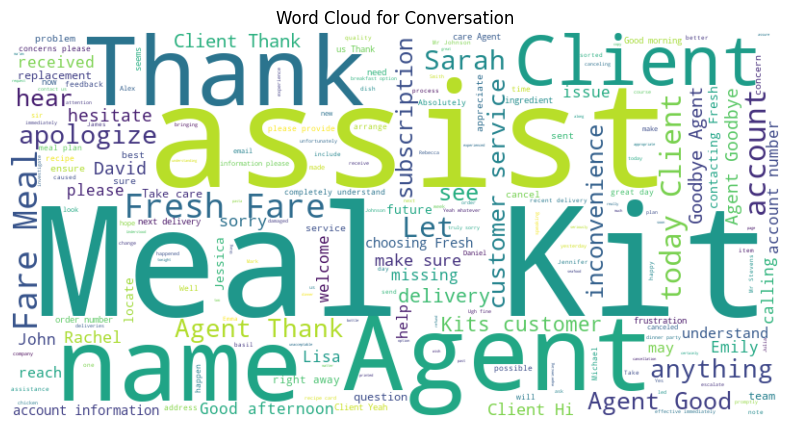

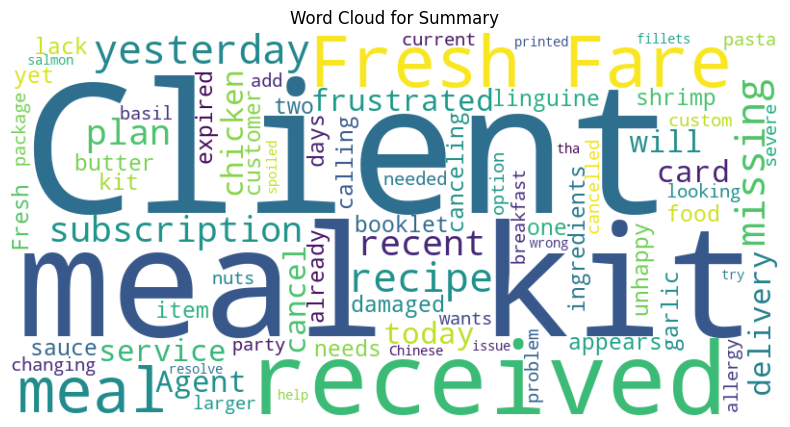

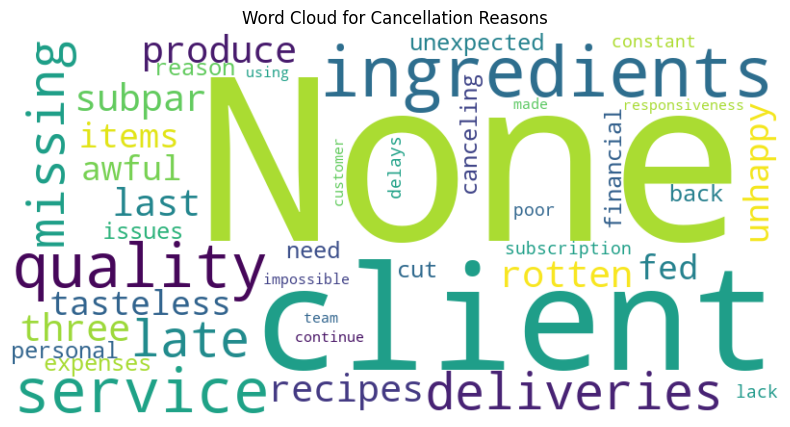

In [24]:
# Generate a word cloud for the 'Conversation' column
generate_wordcloud(df['Conversation'], "Word Cloud for Conversation")
 
# Generate a word cloud for the 'Summary' column
generate_wordcloud(df['Summary'], "Word Cloud for Summary")

# Generate a word cloud for the 'Cancellation Reasons' column
generate_wordcloud(df['Cancellation_reasons'], "Word Cloud for Cancellation Reasons")